<br>
<br>


**Problem Breaks down into five simple steps to solve a problem in monte carlo method:**
- Setting up a probability distribution for important variables.
- Building a cumulative probability distributino for each variable.
- Establishing an interval of random numbers for each variable.
- Generating random numbers.
- Actually simulating a serics of trials.


<br>
<br>

In [3]:

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


<br>
<br>

# `#2: Coin Toss Gambling Game:`

<br>
<br>

In [220]:

# coin toss:
def coin_toss()->int:
    return np.random.randint(0,2)

def gambling_game(no_of_game:int)->tuple[pd.DataFrame,tuple[int,int]]:
    records = []
    win_count = 0
    lose_count = 0
    for i in range(1,no_of_game+1):
        flips = 0
        head_count = 0
        tail_count = 0
        while(abs(head_count-tail_count))<3:
            flips+=1
            if coin_toss()==0:
                head_count+=1
            else:
                tail_count+=1
        if flips<8:
            win_count+=1
        else: 
            lose_count+=1
        records.append({"Game_no":i,"Head_Count":head_count,"Tail_Count":tail_count,"Result":flips<8})
            
    return pd.DataFrame(records),(win_count,lose_count)

data_frame,count = gambling_game(50)
print("Win,Loss ",count)
data_frame

Win,Loss  (27, 23)


,Game_no,Head_Count,Tail_Count,Result
0,1,2,5,True
1,2,3,0,True
2,3,26,23,False
3,4,11,8,False
4,5,3,0,True
5,6,2,5,True
6,7,2,5,True
7,8,4,1,True
8,9,13,16,False
9,10,1,4,True


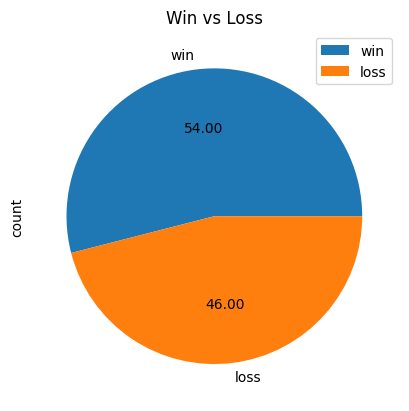

In [238]:


plt.title(f"Win vs Loss")
data_frame["Result"].astype(int).value_counts().rename({0:"loss",1:"win"}).plot(kind="pie",autopct="%.2f")
plt.legend()
plt.show()



<br>
<br>

# `#4: Value of pi:`

<br>

```txt
Area of circle = pi*r^2
Area of sqaure = 2r*2r = 4 r*2 

pi*r^2/4r^2 = pi/4 = inside_circle/total 

pi = 4 *(inside_cricle/4)
```

<br>

In [ ]:
np.random.random(size=5)

array([0.52379151, 0.04989003, 0.80648609, 0.49868528, 0.70758883])

In [ ]:

def value_of_pi(n:int):
    x = np.random.random(size=n)
    y = np.random.random(size=n)
    inside_cnt = 0
    val = []
    for i in range(n):
        if (x[i]**2+y[i]**2)<1:
            inside_cnt +=1 
        value = 4*(inside_cnt/(i+1))
        val.append(value)
    return value,val

value, val = value_of_pi(100000)
value

3.1398

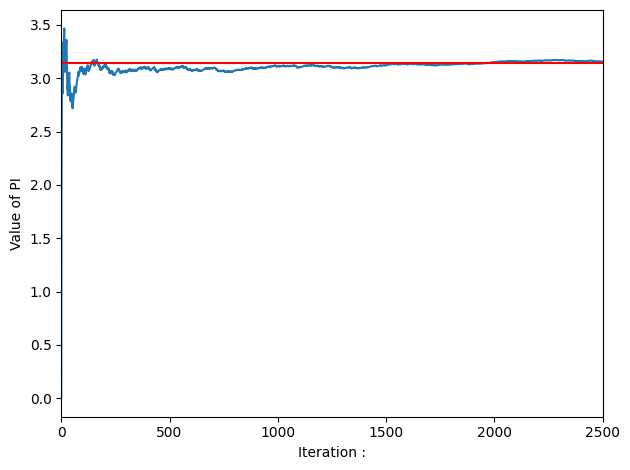

In [ ]:


plt.plot(val)
plt.axhline(y=np.pi,color="red")
plt.xlabel("Iteration :")
plt.ylabel("Value of PI")
plt.xlim(0,2500)
plt.tight_layout()
plt.show()



<br>
<br>

# `#03: Numerical Intregation:`

```txt
- যেকোনো, x_i তে curve-এর height = xi_3
- তার নিচে থাকা সব y value হলো valid area
```
<br>
<br>

In [6]:

# true value: 152.25
def make_eq(x):
    return x**3 


def numerical_intregation(n:int,upper_limit:int,lower_limit:int):
    val = []
    rec_height = make_eq(upper_limit)
    x  = np.linspace(lower_limit,upper_limit,n)
    y = np.random.random(n)*rec_height
    x_3 = x**3 
    shed_val = 0
    for i in range(n):
        if y[i]<x_3[i]:
            shed_val+=1
        area = (shed_val/(i+1)) * rec_height * (upper_limit-lower_limit)
        val.append(area)
    return area,val

area , val = numerical_intregation(10000,5,2)
print(area)

151.0125


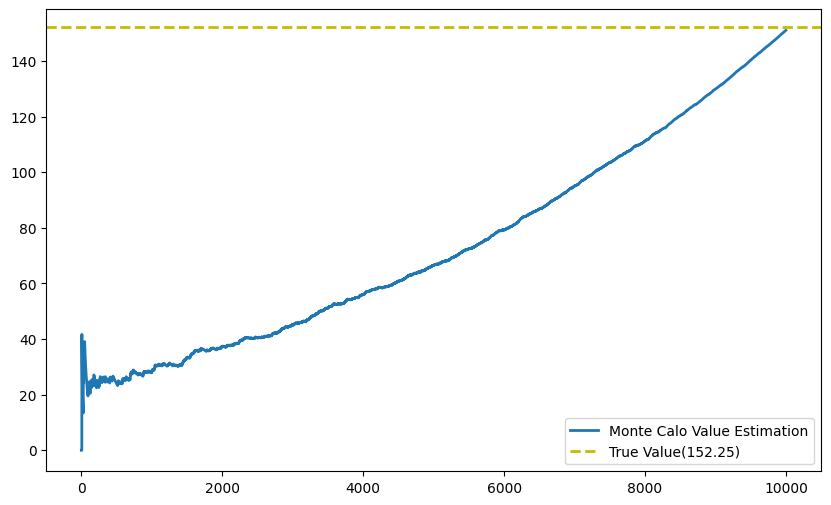

In [22]:

plt.figure(figsize=(10,6))
plt.plot(val,label="Monte Calo Value Estimation",linewidth=2)
plt.axhline(y=152.25,linestyle="--",color="y",label="True Value(152.25)",linewidth=2)
plt.legend()
plt.show()
